In [3]:
X, Y = [], []

def grid_to_tuple(grid):
    tup = []
    for x in grid:
        if x == '-':
            tup.append(0)
        elif x == 'x':
            tup.append(1)
        elif x == 'o':
            tup.append(-1)
        else:
            assert False
    return tuple(tup)

for line in open('train_data.txt').readlines():
    grid, result = line.strip().split()
    X.append(grid_to_tuple(grid))
    Y.append(result == 'True')

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_small = pca.fit_transform(X)

<AxesSubplot: >

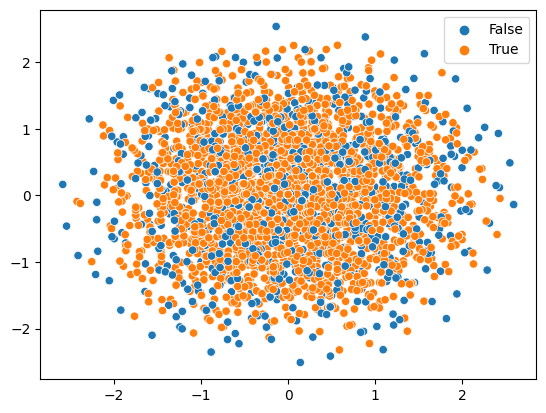

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

X_small = np.array(X_small)

sns.scatterplot(x=X_small[:, 0], y=X_small[:, 1], hue=Y)

In [24]:
from sklearn.model_selection import train_test_split


train_features, test_features, train_labels, test_labels = train_test_split(
    X, Y, train_size=0.7, shuffle=False
)

In [25]:
len(train_features), len(test_features)

(5373, 2304)

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc = SVC()

svc.fit(train_features, train_labels)

pred = svc.predict(test_features)

confusion_matrix(pred, test_labels)

array([[ 209,   16],
       [ 351, 1728]])

In [28]:
for a, b in zip(pred, test_labels):
    print(a, b)

False False
True True
False False
True True
True True
True False
True True
True True
True True
False False
True True
True True
True True
True False
True True
True True
True True
True True
True True
True True
True False
True True
True False
True True
True True
True True
True True
True True
True False
True True
True False
True True
False False
True True
True False
True True
False False
True True
True False
True True
True True
False False
True True
False False
True True
True True
True True
True True
True True
True False
True True
True True
True True
True False
True True
True False
True True
True True
True False
True True
True True
True True
True True
True True
True False
True True
True True
True True
True True
True True
True True
True True
True True
True False
True True
True True
True True
True False
True True
True False
True True
True True
True True
True True
True False
True True
True False
True True
True True
True True
True False
True True
True True
True True
True True
True True
True Tr

In [ ]:
def has_winner(grid):
    for i in range(3):
        sum = grid[i * 3] + grid[i * 3 + 1] + grid[i * 3 + 2]
        if (sum == 3 or sum == -3): return sum / 3

    for i in range(3):
        sum = grid[i] + grid[i + 3] + grid[i + 6]
        if (sum == 3 or sum == -3): return sum / 3

    sum = grid[0] + grid[4] + grid[8]
    if (sum == 3 or sum == -3): return sum / 3
    sum = grid[2] + grid[4] + grid[6]
    if (sum == 3 or sum == -3): return sum / 3

    return 0


def is_player_winner(player, grid):
    winner = has_winner(grid)
    if winner == 0: return 0
    if winner == 1 and player == 0: return 1  # player X won, he gets 1
    if winner == -1 and player == 1: return 1  # player O won, he gets 1
    return -1


def is_full(grid):
    for v in grid:
        if v == 0: return False
    return True


def get_grid_hash(grid):
    hash = ""
    for v in grid:
        hash += "x" if v == 1 else ("o" if v == -1 else "-")
    return hash


def get_available_actions(grid):
    actions = []
    for i, v in enumerate(grid):
        if v == 0:
            actions.append(i)
    return actions


print("Play by entering the number of cell to put X in.")
done = False
grid = np.zeros(9)

while not done:
    print('\nAvailable moves:', get_available_actions(grid))
    cellStr = input("enter your move: ")
    cell = int(cellStr)
    if(grid[cell] != 0):
        print(cellStr, ' is taken! Try again')
        continue
    grid[cell] = 1
    hash = get_grid_hash(grid)
    print('You:')
    displayGrid(grid)
    winner = has_winner(grid)
    if winner != 0:
        print('*** YOU WON ***')
        done = True
        break
    if is_full(grid):
        done = True
        print('DRAW')
        break

    my_action = get_available_actions(grid)[0]
    is_winning = False
    for action in get_available_actions(grid):
        cgrid = grid.copy()
        cgrid[action] = -1
        if get_winner(cgrid, 1) == -1:
            my_action = action
            is_winning = True

    if not is_winning:
        for action in get_available_actions(grid):
            cgrid = grid.copy()
            cgrid[action] = -1
            if get_winner(cgrid, 1) == 0:
                my_action = action

    grid[my_action] = -1
    hash = get_grid_hash(grid)
    print("Algorithm:")
    displayGrid(grid)
    winner = has_winner(grid)
    if winner != 0:
        print('--- YOU LOST ---')
        done = True
        break